In [2]:
library(tidyverse)

In [3]:
setwd("C:/Soongsil/R/ADP/모의고사 R코드 및 데이터/모의고사 2회")

### 1)
- 종속변수인 chance_of_admit(입학 허가 확률)와 독립변수(GRE, TOEFL, Univ_Rating, SOP, LOR, CGPA)에 대해 피어슨 상관계수를 이용한 상관관계 분석을 수행하고 그래프를 이용하여 분석결과를 설명하시오.

In [4]:
Admission <- read.csv("Admission.csv")

In [5]:
sum(is.na(Admission))

[1] 0

In [6]:
cor.test(Admission$GRE, Admission$Chance_of_Admit)
# cor.test(Admission$TOEFL, Admission$Chance_of_Admit)
# cor.test(Admission$Univ_Rating, Admission$Chance_of_Admit)
# cor.test(Admission$SOP, Admission$Chance_of_Admit)
# cor.test(Admission$LOR, Admission$Chance_of_Admit)
# cor.test(Admission$CGPA, Admission$Chance_of_Admit)


	Pearson's product-moment correlation

data:  Admission$GRE and Admission$Chance_of_Admit
t = 26.843, df = 398, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7647419 0.8349536
sample estimates:
      cor 
0.8026105 


- 귀무가설 : GRE, TOEFL, Univ_Rating, SOP, LOR, CGPA, Chance_of_Admit과 상관관계 없음
- 귀무가설 기각 => 모든 변수들이 Chance_of_Admit과 양의 상관관계

In [8]:
library(corrplot)

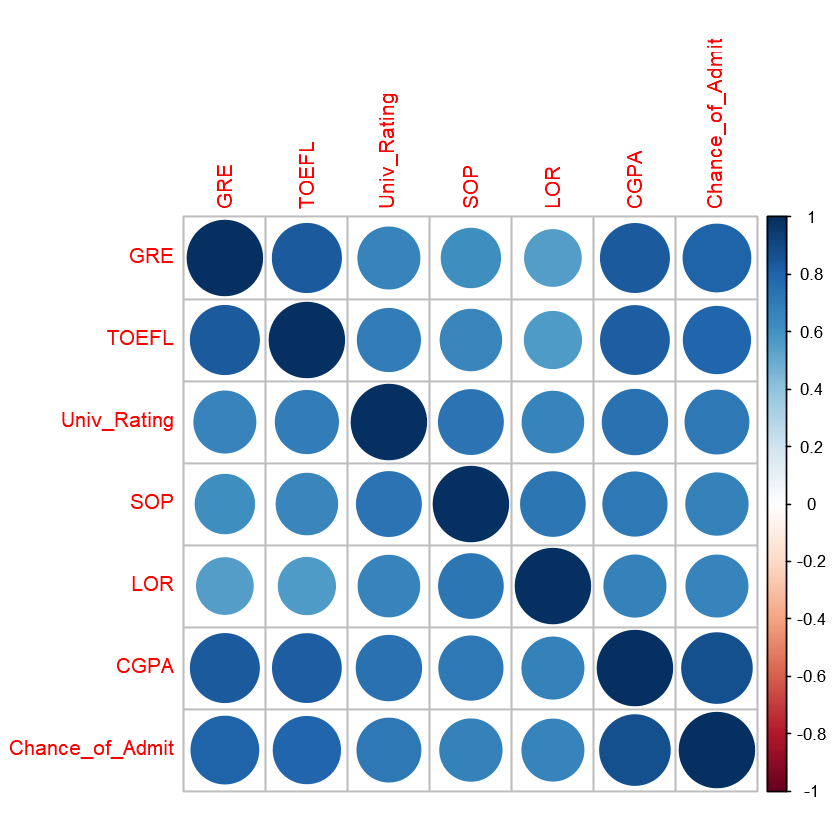

In [9]:
corrplot(cor(Admission[,-7]), 
         "circle") 

### 2)
- GRE, TOEFL, Univ_Rating, SOP, LOR, CGPA, Research가 Chance_of_Admit에 영향을 미치는지 알아보는 회귀분석을 단계적 선택법을 사용하여 수행하고 결과를 해석하시오.

In [10]:
fullmod <- lm(Chance_of_Admit ~ ., data = Admission) 
fullmod %>% summary


Call:
lm(formula = Chance_of_Admit ~ ., data = Admission)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.26259 -0.02103  0.01005  0.03628  0.15928 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.2594325  0.1247307 -10.097  < 2e-16 ***
GRE          0.0017374  0.0005979   2.906  0.00387 ** 
TOEFL        0.0029196  0.0010895   2.680  0.00768 ** 
Univ_Rating  0.0057167  0.0047704   1.198  0.23150    
SOP         -0.0033052  0.0055616  -0.594  0.55267    
LOR          0.0223531  0.0055415   4.034  6.6e-05 ***
CGPA         0.1189395  0.0122194   9.734  < 2e-16 ***
Research     0.0245251  0.0079598   3.081  0.00221 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06378 on 392 degrees of freedom
Multiple R-squared:  0.8035,	Adjusted R-squared:    0.8 
F-statistic: 228.9 on 7 and 392 DF,  p-value: < 2.2e-16


- 완전모형의 추정식 : Chance_of_Admit = 1.2594325 + 0.0017374 * GRE + 0.0029196 * TOEFL + 0.0057167 * Univ_Rating 0.0033052 * SOP + 0.0223531 * LOR + 0.1189395 * CGPA + 0.0245251 * Research
- 모형의 F통계량의 P값 < 0.05 => 완전모형은 통계적으로 유의
- 본 모형의 R^2 : 0.8035 => 본 회귀모형은 데이터의 80.35%를 설명

In [11]:
stepmod <- step(fullmod) 

Start:  AIC=-2193.9
Chance_of_Admit ~ GRE + TOEFL + Univ_Rating + SOP + LOR + CGPA + 
    Research

              Df Sum of Sq    RSS     AIC
- SOP          1   0.00144 1.5962 -2195.5
- Univ_Rating  1   0.00584 1.6006 -2194.4
<none>                     1.5948 -2193.9
- TOEFL        1   0.02921 1.6240 -2188.6
- GRE          1   0.03435 1.6291 -2187.4
- Research     1   0.03862 1.6334 -2186.3
- LOR          1   0.06620 1.6609 -2179.6
- CGPA         1   0.38544 1.9802 -2109.3

Step:  AIC=-2195.54
Chance_of_Admit ~ GRE + TOEFL + Univ_Rating + LOR + CGPA + Research

              Df Sum of Sq    RSS     AIC
- Univ_Rating  1   0.00464 1.6008 -2196.4
<none>                     1.5962 -2195.5
- TOEFL        1   0.02806 1.6242 -2190.6
- GRE          1   0.03565 1.6318 -2188.7
- Research     1   0.03769 1.6339 -2188.2
- LOR          1   0.06983 1.6660 -2180.4
- CGPA         1   0.38660 1.9828 -2110.8

Step:  AIC=-2196.38
Chance_of_Admit ~ GRE + TOEFL + LOR + CGPA + Research

           Df Sum of

In [12]:
stepmod %>% summary


Call:
lm(formula = Chance_of_Admit ~ GRE + TOEFL + LOR + CGPA + Research, 
    data = Admission)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.263542 -0.023297  0.009879  0.038078  0.159897 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.2984636  0.1172905 -11.070  < 2e-16 ***
GRE          0.0017820  0.0005955   2.992  0.00294 ** 
TOEFL        0.0030320  0.0010651   2.847  0.00465 ** 
LOR          0.0227762  0.0048039   4.741 2.97e-06 ***
CGPA         0.1210042  0.0117349  10.312  < 2e-16 ***
Research     0.0245769  0.0079203   3.103  0.00205 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06374 on 394 degrees of freedom
Multiple R-squared:  0.8027,	Adjusted R-squared:  0.8002 
F-statistic: 320.6 on 5 and 394 DF,  p-value: < 2.2e-16


- AIC값을 기준으로 최적모형의 추정식 : Chance_of_Admit = 1.2984636 + 0.0017820 * GRE + 0.0030320 * TOEFL + 0.0227762 * LOR + 0.1210042 * CGPA + 0.0245769  * Research
- 최적모형 F통계량의 P값 < 0.05 => 최적모형은 통계적으로 유의
- 최적모형의 R^2값 : 0.8027 => 전체 데이터의 80.27%를 설명

### 3)
- 단계 선택법을 사용해 변수를 선택한 후 새롭게 생성한 회귀모형에 대한 잔차분석을 수행하고 결과를 해석하시오. 

In [14]:
library(lmtest)

In [15]:
dwtest(stepmod)


	Durbin-Watson test

data:  stepmod
DW = 0.74991, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


- 귀무가설 : 잔차의 독립성 가정 만족
- 더빈왓슨 검정 결과, 더빈왓슨 값 = 0.74991, P값 < 0.05 => 잔차의 독립성 가정 만족X

In [16]:
shapiro.test(resid(stepmod))


	Shapiro-Wilk normality test

data:  resid(stepmod)
W = 0.92193, p-value = 1.443e-13


- 귀무가설 : 잔차 정규성 만족
- P값 < 0.05 => 잔차 정규성 만족X

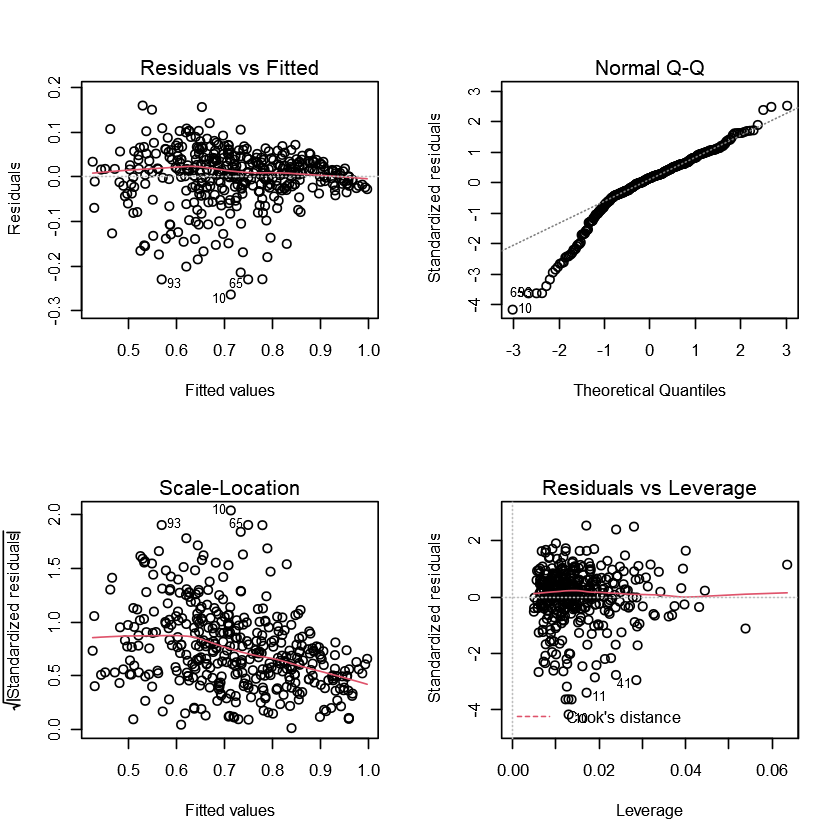

In [17]:
par(mfrow = c(2, 2))
plot(stepmod)
par(mfrow = c(1, 1))

1. 잔차 vs 적합값의 분포 (등분산성 가정 확인) : 그래프의 기울기를 나타내는 빨간색 선이 직선의 성향을 띠고 있기에. 잔차는 평균인 0을 중심으로 고르게 분포
2. Q-Q Plot (정규성 가정 확인) : 대각선에서 벗어난 점들이 많이 있는 것으로 보아 데이터가 정규성을 만족하지 않음
3. Scale-Location (등분산성 가정 확인) : 빨간선의 기울기가 0에 가까워야 하지만, 적합값이 커질수록 기울기가 줄어듬. 빨간선의 기울기가 0에서 떨어진 점이 있다면 해당 점에서는 표준화 전차가 큼을 의미하고, 회귀 직선이 y값을 잘 적합하지 못함을 의미함. 또한 해당 점들은 이상치일 가능성이 있다.
4. 잔차 vs 레버리지 (영향력 진단) : 그래프에서 쿡의 거리가 0.5이상이면 빨간 점선으로 표시되고, 점선 바깥에 있는 점들은 무시할 수 없을 정도로 예측치를 벗어난 관측값이다. 본 그래프에서 그러한 점은 보이지 않으므로, 회귀직선에 크게 영향을 끼치는 점들은 드물다고 볼 수 있다.

## 02. 정형 데이터마이닝

### 1)
- cabib, embarked변수의 값 중 ""로 처리된 값을 NA로 바꾸고 아래의 데이터 테이블을 보고 문자형, 범주형 변수들을 각각 character, factor형으로 변환하시오. 또, 수치형 변수가 NA인 값을 중앙값으로 대체하고, 범주형 변수가 NA인 값을 최빈값으로 대체하고 age변수를 아래의 표와 같이 구간화하여 age_1이라는 변수를 생성하고 추가하시오. 

In [18]:
titanic <- read.csv("titanic.csv")
sum(is.na(titanic))

[1] 264

In [19]:
titanic2 <- titanic %>% 
    mutate(cabin = ifelse(cabin == "", NA, cabin) %>% as.character) %>%
    mutate(embarked = ifelse(embarked == "", NA, embarked) %>% as.factor)

In [20]:
sum(is.na(titanic2))

[1] 1280

In [23]:
library(DMwR)

In [22]:
titanic3 <- titanic2 %>% centralImputation
sum(is.na(titanic3))

[1] 0

In [24]:
summary(titanic3$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.17   22.00   28.00   29.50   35.00   80.00 

In [25]:
titanic4 <- titanic3 %>% 
    mutate(age_1 = ifelse(age >= 0 & age < 10, "0", 
                    ifelse(age >= 10 & age < 20, "1",
                    ifelse(age >= 20 & age < 30, "2",
                    ifelse(age >= 30 & age < 40, "3",
                    ifelse(age >= 40 & age < 50, "4",
                    ifelse(age >= 50 & age < 60, "5",
                    ifelse(age >= 60 & age < 70, "6",
                    ifelse(age >= 70 & age < 80, "7", "8")))))))) %>% as.factor) 

### 2)
- 전처리가 완료된 titanic 데이터를 train(70%), test(30%) 데이터로 분할하시오.(set.seed(12345)를 실행한 후 데이터를 분할하시오.) 또, train 데이터로 종속변수인 survived(생존 여부)를 독립변수 pclass, sex, sibsp, parch fare, embarked로 지정하여 예측하는 분류모델을 3개 이상 생성하고 test 데이터에 대한  예측값을 csv파일로 각각 제출하시오.

In [28]:
titanic4 <- titanic4 %>%
    mutate(survived = as.factor(survived)) %>%
    mutate(sex = as.factor(sex)) %>%
    mutate(pclass = as.factor(pclass))

In [29]:
set.seed(12345)
train <- sample(1:nrow(titanic4), 0.7 * nrow(titanic4), replace = F)
test <- setdiff(1:nrow(titanic4), train)

In [30]:
vars <- c("survived", "pclass", "sex", "sibsp", "parch", "fare", "embarked")
train_d <- titanic4[train, vars]
test_d <- titanic4[test, vars]

In [31]:
model1 <- glm(survived ~ ., family = binomial(link = "logit"),
              data = train_d)

In [32]:
model1 %>% step %>% summary

Start:  AIC=860.6
survived ~ pclass + sex + sibsp + parch + fare + embarked

           Df Deviance     AIC
- parch     1   842.86  858.86
- fare      1   843.18  859.18
<none>          842.60  860.60
- sibsp     1   848.64  864.64
- embarked  2   854.28  868.28
- pclass    2   884.73  898.73
- sex       1  1077.22 1093.22

Step:  AIC=858.86
survived ~ pclass + sex + sibsp + fare + embarked

           Df Deviance     AIC
- fare      1   843.30  857.30
<none>          842.86  858.86
- sibsp     1   849.92  863.92
- embarked  2   854.52  866.52
- pclass    2   887.99  899.99
- sex       1  1083.89 1097.89

Step:  AIC=857.3
survived ~ pclass + sex + sibsp + embarked

           Df Deviance     AIC
<none>          843.30  857.30
- sibsp     1   849.93  861.93
- embarked  2   855.81  865.81
- pclass    2   911.73  921.73
- sex       1  1089.31 1101.31



Call:
glm(formula = survived ~ pclass + sex + sibsp + embarked, family = binomial(link = "logit"), 
    data = train_d)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3774  -0.7089  -0.4421   0.6681   2.5840  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   2.7650     0.2655  10.416  < 2e-16 ***
pclass2      -0.6635     0.2466  -2.691 0.007132 ** 
pclass3      -1.6869     0.2173  -7.762 8.35e-15 ***
sexmale      -2.6390     0.1892 -13.950  < 2e-16 ***
sibsp        -0.2565     0.1073  -2.389 0.016882 *  
embarkedQ    -0.9830     0.3634  -2.705 0.006837 ** 
embarkedS    -0.7155     0.2167  -3.301 0.000962 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1213.5  on 915  degrees of freedom
Residual deviance:  843.3  on 909  degrees of freedom
AIC: 857.3

Number of Fisher Scoring iterations: 5


- step함수를 활용하여 단계적 선택법을 활용해 로지스틱 회귀식의 확인 결과, parch, fare를 제외한 모든 설명변수가 유의확률 0.05하에서 유의하게 나타났으며, 가장 영향을 많이 끼치는 변수는 sex = male로 나타났다.

In [33]:
pred1 <- predict(model1, newdata = test_d, type = "response")

In [34]:
submission1 <- pred1 %>% round

In [35]:
table(submission1, test_d$survived)
mean(submission1 == test_d$survived)

           
submission1   0   1
          0 202  51
          1  36 104

[1] 0.778626

In [36]:
write.csv(submission1, "Logistic_model_predictions.csv")

### 랜덤포레스트
1. 나무의 수
- 오류율을 안정화하려면 트리수가 충분히 커야함 p X 10으로 시작
- mtry나 노드 크기에 따라 더 많거나 적은 수의 트리가 필요함
- 많은 트리는 더 강력하고 안정한 오류추정값과 변수 중요도를 제공

2. mtry
- 분할 변수 무작위의 기능을 제어
- 낮은 트리 상관관계와 합리적인 예측강도의 균형을 맞춤
- 회귀의 경우 mtry = p / 3
- 분류의 경우 mtry = sqrt(p)

3. 트리의 복잡성
- 노드 크기, 최대 깊이, 최대 터미널 노드 수, 추가분할 허용 여부
- 회귀의 경우 : 5
- 분류의 경우 : 1
- 데이터에 노이즈가 많은 경우 노드 크기를 증가 (트리 깊이 및 복잡성 감소)하여 성능을 향상

4. 샘플링 방식
- 샘플링 크기와 복원추출 여부를 모두 조정 가능
- 샘플링 크기를 줄이면 트리가 다양해지고, 트리간 상관관게가 낮아짐 => 긍정적 영향
- 범주의 수가 많은 범주형 변수의 경우, 복원추출은 변수 분할에 편향이 발생 가능
- 균형이 맞지 않는 범주가 있는 경우, 비복원 추출을 사용하면 편향이 감소

5. 분할규칙
- 분류의 경우 : 지니 불순도
- 회귀 경우 : SSE

- importance : 변수 중요도의 측정값
- impurity : 불순도
- permutation : 각 트리에 대해 OOB샘플이 트리 아래로 전달되고, 예측 정확도가 기록, 각 변수의 값이 무작위로 치환되고 정확도가 다시 계산, 변수 값의 무작위 셔플링으로인한 정확도 감소는 각 예측 변수의 모든 트리에 대해 평균화, 정확도의 평균 감소가 가장 큰 변수가 가장 중요한 것으로 간주

In [38]:
library(randomForest)
model2 <- randomForest(factor(survived) ~ ., data = train_d,
                       mtry = 5, importance = TRUE, ntree = 500)

In [39]:
model2


Call:
 randomForest(formula = factor(survived) ~ ., data = train_d,      mtry = 5, importance = TRUE, ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 21.62%
Confusion matrix:
    0   1 class.error
0 497  74   0.1295972
1 124 221   0.3594203

- 랜덤포레스트 분석 실시결과, OBB가 약 21%로 분류모델의 성능이 좋게 나타나진 않고 있으며, 혼동행렬의 class.error값이 survived일때 약 0.36로 높게 나타나 있음을 알 수 있다.

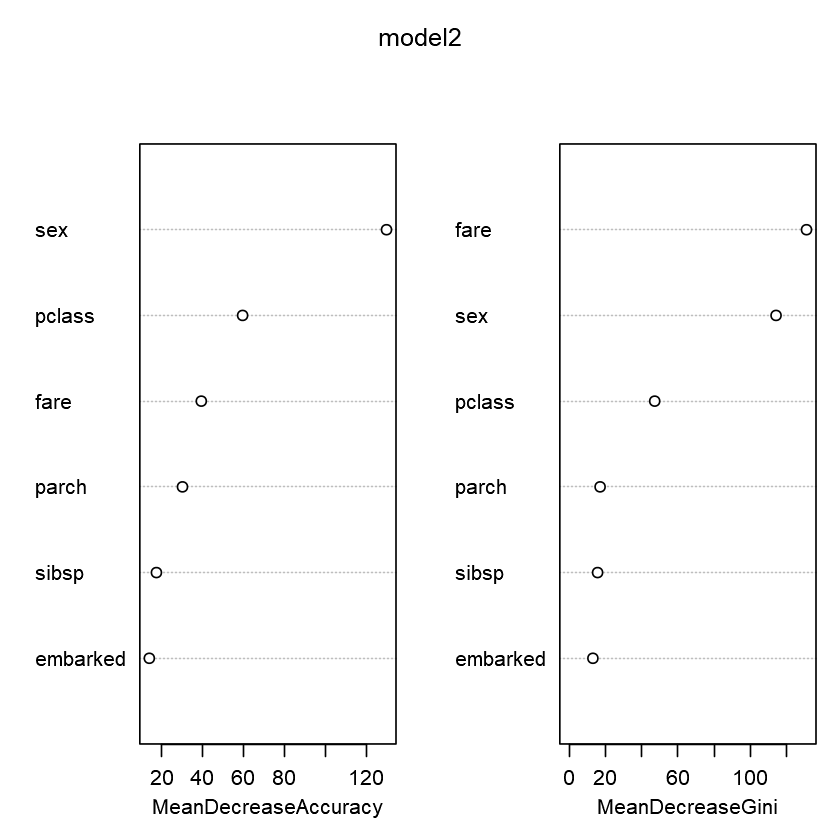

In [40]:
randomForest::varImpPlot(model2)

- 변수중요도 : 변수가 정확도와 노드 불순도 개선에 많은 영향을 미치는지에 대해 측정
- MeanDecreaseAccuracy : 구축된 나무의 정확도가 특정 변수 제거 후 재구축 했을 때 감소되는 정확도의 차이를 변수별로 평균화 한 것
- MeanDecreaseGini : (노드 불순도 개선) 생성된 나무 모형이 가지를 뻗어나갈 때 마다 선택되는 변수들의 불순도 감소량을 측정해 전체 나무로부터의 그 평균치 ㄱ밧을 사용

In [41]:
pred2 <- predict(model2, newdata = test_d, type = "prob") 

In [42]:
submission2 <- round(pred2)[,2]

In [43]:
table(submission2, test_d$survived)
mean(submission2 == test_d$survived)

           
submission2   0   1
          0 214  63
          1  24  92

[1] 0.778626

In [44]:
write.csv(submission2, "Random_Forest_Predictions.csv")

```
library(ranger)
(n_features <- length(setdiff(names(train_d), "survived")))
```

```
hyper_grid <- expand.grid(
    mtry = c(2, 3, 4, 5),
    num.trees = c(500, 1000),
    min.node.size = c(1, 3, 5, 10),
    replace = c(TRUE, FALSE),
    sample.fraction = c(0.5, 0.63, 0.8),
    error = NA
)
```

```
for (i in seq_len(nrow(hyper_grid))) {
    fit <- ranger(
        formula = factor(survived) ~ .,
        data = train_d,
        num.trees = hyper_grid$num.trees[i],
        mtry = hyper_grid$mtry[i],
        min.node.size = hyper_grid$min.node.size[i],
        replace = hyper_grid$replace[i],
        sample.fraction = hyper_grid$sample.fraction[i],
        importance = "impurity",
        verbose = FALSE,
        seed = 123
    )
    hyper_grid$error = fit$prediction.error
}
```

In [148]:
n_features <- length(setdiff(names(train_d), "survived"))

In [189]:
library(ranger)

rf.model <- ranger(formula = factor(survived) ~ .,
                   data = train_d,
                   num.trees = 1000,
                   mtry = round(sqrt(n_features)),
                   min.node.size = 1,
                   importance = "impurity",
                   probability = TRUE,
                   seed = 123)

In [190]:
rf.model %>% print

Ranger result

Call:
 ranger(formula = factor(survived) ~ ., data = train_d, num.trees = 1000,      mtry = round(sqrt(n_features)), min.node.size = 1, importance = "impurity",      probability = TRUE, seed = 123) 

Type:                             Probability estimation 
Number of trees:                  1000 
Sample size:                      916 
Number of independent variables:  6 
Mtry:                             2 
Target node size:                 1 
Variable importance mode:         impurity 
Splitrule:                        gini 
OOB prediction error (Brier s.):  0.1383513 


In [201]:
ranf.auc <- predict(rf.model, test_d)$predictions[, 2]
ranf.pred <- predict(rf.model, test_d)$predictions[, 2] %>% round

In [152]:
ranger::importance(rf.model) %>% sort(decreasing = T)

sex      fare    pclass     parch     sibsp  embarked 
100.10034  68.15538  34.98470  17.75492  13.41637  11.36838

### SVM

In [51]:
library(e1071)

In [52]:
costs = c(0.1, 0.5, 1, 10, 100)
gammas <- c(0.5, 1, 2, 3, 4, 5)

In [53]:
tune.out <- tune(svm, survived ~ .,
                 data = train_d,
                 range = list(costs = costs,
                              gamma = gammas),
                 decision.values = T)

In [54]:
tune.out


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 costs gamma
   0.1     1

- best performance: 0.2096273 


- 하이퍼파라미터 튜닝 결과 cost = 0.1, gamma = 1의 값이 최적의 하이퍼파라미터임을 알 수 있다

In [55]:
model3 <- tune.out$best.model

In [56]:
pred3 <- predict(model3, test_d, decision.values = T)

In [57]:
submission3 <- predict(model3, test_d, type = "class")

In [58]:
write.csv(submission3, "Support_Vector_Machine_predictions.csv")

In [59]:
table(submission3, test_d$survived)
mean(submission3 == test_d$survived)

           
submission3   0   1
          0 218  78
          1  20  77

[1] 0.7506361

In [61]:
library(MASS)

In [62]:
model4 <- lda(survived ~ ., data = train_d)

In [63]:
# model4

- 선형판별분석 결과 가장 영향을 많이 끼치는 변수는 sex = male로 나타났다

In [64]:
pred4 <- predict(model4, newdata = test_d, type = "prob") %>% .$posterior

In [65]:
submission4 <- round(pred4)[, 2]

In [66]:
write.csv(submission4, "LDA_predictions.csv")

In [67]:
table(submission4, test_d$survived)
mean(submission4 == test_d$survived)

           
submission4   0   1
          0 208  50
          1  30 105

[1] 0.7964377

### XGB
- xgboost 는 변수에 대한 행렬 입력이 필요하고 응답은 벡터
- 결과적으로 변수의 행렬 입력을 제공하려면 범주형 변수를 숫자로 인코딩 (원-핫 인코딩, 레이블 인코딩).

In [69]:
library(recipes)

In [70]:
train_d  <- train_d %>% 
    mutate(sex = as.factor(sex)) 

test_d <- test_d %>%
    mutate(sex = as.factor(sex))

In [71]:
xgb_trprep <- recipe(survived ~ ., data = train_d) %>%
  step_integer(all_nominal()) %>%
  prep(training = train_d, retain = TRUE) %>%
  juice()

xgb_tsprep <- recipe(survived ~ ., data = test_d) %>%
  step_integer(all_nominal()) %>%
  prep(training = test_d, retain = TRUE) %>%
  juice()

In [73]:
library(xgboost)

In [74]:
X_train <- as.matrix(xgb_trprep[setdiff(names(xgb_trprep), "survived")])
Y_train <- xgb_trprep$survived - 1

X_test <- as.matrix(xgb_tsprep[setdiff(names(xgb_tsprep), "survived")])
Y_test <- xgb_tsprep$survived - 1

In [75]:
dtrain <- xgb.DMatrix(data = X_train, label = Y_train)
dtest <- xgb.DMatrix(data = X_test, label = Y_test)

```objective : reg:linear (선형회귀), binary:logistic (이진분류), multi:softmax (다지분류)```

In [76]:
xgb.model <- xgb.cv(
    booster = "gbtree", # "gblinear"
    data = dtrain,
    nrounds = 6000,
    objective = "binary:logistic",
    early_stopping_rounds = 50, 
    nfold = 10,
    params = list(
        eta = 0.1, # 학습률 (작을수록 과대 적합에 강건 / default : 0.3)
        max_depth = 3, # 한 트리의 최대 깊이 (default = 0)
        gamma = 5, # Information Gain에 페널티를 부여 (클수록 트리의 깊이가 감소, 보수적인 알고리즘)
        min_child_weight = 3, 
        subsample = 0.8, # 훈련 데이터의 샘플 비율 (default = 1)
        colsample_bytree = 1, # 개별 트리 구성할 때 컬럼의 subsample 비율 (default = 1)
        eval_metric = "error"), # "rmse" / "auc"
    verbose = 0
)

In [77]:
xgb.model$evaluation_log %>% head %>% print

   iter train_error_mean train_error_std test_error_mean test_error_std
1:    1        0.2000242     0.005946153       0.2182216     0.03474888
2:    2        0.1988115     0.006660345       0.2094906     0.04114321
3:    3        0.1996600     0.006365090       0.2084390     0.03803987
4:    4        0.1975969     0.006430559       0.2117358     0.03876911
5:    5        0.1974756     0.005055783       0.2105891     0.03966463
6:    6        0.1951698     0.006263747       0.2083914     0.03876368


In [78]:
hyper_grid <- expand.grid(
  eta = 0.1, # 학습율
  max_depth = 3, # 트리의 깊이
  min_child_weight = 3, # 터미널 노드 최소 관측값 수 
  subsample = 0.5,  # 행 재표본추출 비율
  colsample_bytree = 0.5, # 각 나무마다 열 재표본추출 비율
  gamma = c(0, 1, 10, 100, 1000),
  error = NA,          
  trees = NA          
)

In [79]:
for(i in seq_len(nrow(hyper_grid))) {
  set.seed(123)
  m <- xgb.cv(
    booster = "gbtree",
    data = dtrain,
    nrounds = 4000,
    objective = "binary:logistic",
    early_stopping_rounds = 50, 
    nfold = 10,
    verbose = 0,
    params = list( 
      eta = hyper_grid$eta[i], 
      max_depth = hyper_grid$max_depth[i],
      min_child_weight = hyper_grid$min_child_weight[i],
      subsample = hyper_grid$subsample[i],
      colsample_bytree = hyper_grid$colsample_bytree[i],
      gamma = hyper_grid$gamma[i], 
      eval_metric = "error"  
    ) 
  )
  hyper_grid$error[i] <- min(m$evaluation_log$test_error_mean)
  hyper_grid$trees[i] <- m$best_iteration
}

In [80]:
hyper_grid %>% arrange(error) %>% head(1)

,eta,max_depth,min_child_weight,subsample,colsample_bytree,gamma,error,trees
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.1,3,3,0.5,0.5,0,0.1996714,97


In [87]:
params <- list(booster = "gbtree",
               eta = 0.1,
               max_depth = 3,
               min_child_weight = 3,
               subsample = 0.5,
               colsample_bytree = 0.5,
               gamma = 0,
               eval_metric = "error")

In [88]:
xgb.fit.final <- xgboost(
  params = params,
  dtrain,
  nrounds = 97,
  objective = "binary:logistic",
  verbose = 0
)

In [89]:
imp <- xgb.importance(model = xgb.fit.final) %>% arrange(desc(Gain))
head(imp)

Feature,Gain,Cover,Frequency
<chr>,<dbl>,<dbl>,<dbl>
sex,0.37586848,0.14425990,0.09363296
fare,0.32560945,0.43237504,0.45692884
pclass,0.15365195,0.14377153,0.13670412
parch,0.06076340,0.09642789,0.10674157
embarked,0.05117137,0.11215984,0.13108614
sibsp,0.03293535,0.07100580,0.07490637


Warning message in `[.data.table`(importance_matrix, , `:=`(Importance, sum(get(measure))), :
"Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved."


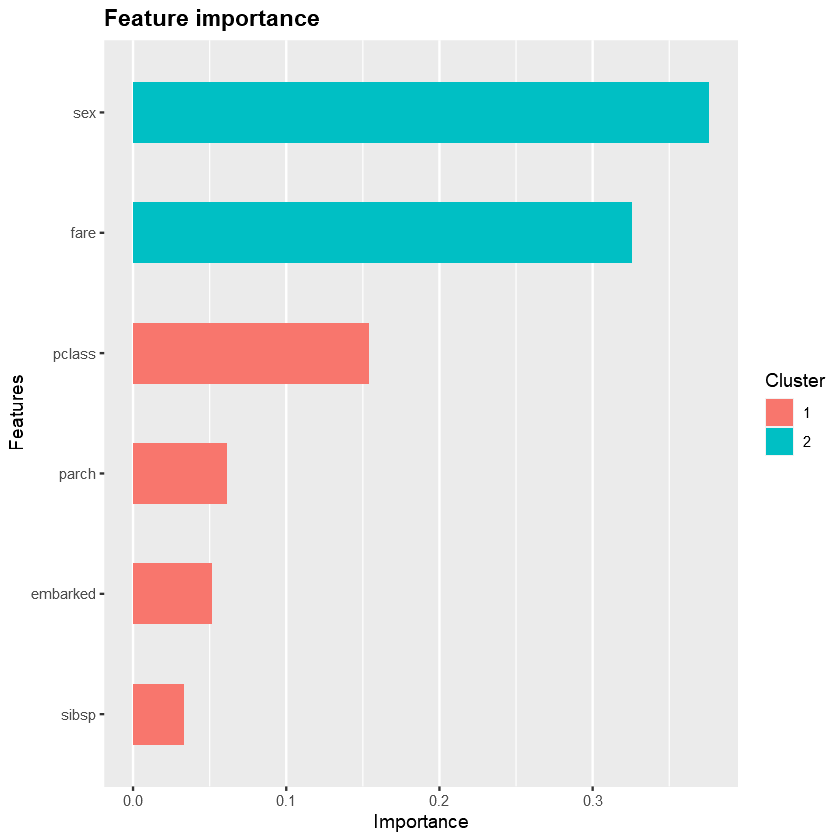

In [209]:
xgboost::xgb.ggplot.importance(importance_matrix = imp, measure = "Gain")

In [132]:
xgb.pred <- predict(xgb.fit.final, newdata = dtest)
xgb.submission <- xgb.pred %>% round

### "gblinear""일 떄

### 1. 정규화
- 모델 복잡성을 줄이고 과적합을 방지하는 데 도움이 되는 여러 정규화 매개변수를 제공
#### gamma
- gamma는 Lagrangian 승수로 알려진 의사 정규화 하이퍼파라미터이며 주어진 트리의 복잡성을 제어
- gamma는 트리의 리프 노드에서 추가 파티션을 만드는 데 필요한 최소 손실 감소를 지정
범위 : 0 ~ Inf, 손실 함수에 따라 다르지만 일반적으로 1~20 사이의 낮은 값 
#### alpha 
- 가중치에 대한 L1규제 (default = 0)
#### lambda
- 가중치에 대한 L2규제
#### lambda_bias
- bias에 대한 L2규제

In [ ]:
hyper_grid <- expand.grid(
  eta = 0.1, # 학습율
  max_depth = 3, # 트리의 깊이
  min_child_weight = 3, # 터미널 노드 최소 관측값 수 
  subsample = 0.5,  # 행 재표본추출 비율
  colsample_bytree = 0.5, # 각 나무마다 열 재표본추출 비율
  gamma = c(0, 1, 10, 100, 1000),
  lambda = c(0, 1e-2, 0.1, 1, 100, 1000, 10000),
  alpha = c(0, 1e-2, 0.1, 1, 100, 1000, 10000),
  rmse = 0,          
  trees = 0          
)

### 3)
-  생성된 3개의 분류모델에 대해 성과분석을 실시하여 정확도를 비교하여 설명하시오. 또, ROC curve를 그리고 AUC값을 산출하시오.

In [118]:
library(ROCR)
library(caret)

In [145]:
# confusionMatrix(factor(submission1), test_d$survived)

In [121]:
lr.roc <- prediction(pred1, test_d$survived)
lr.perf <- performance(lr.roc, measure = "tpr", "fpr")
lr.auc <- performance(lr.roc, measure = "auc")

In [122]:
# plot(lr.perf) %>% abline(a = 0, b = 1, col = "red")
lr.auc@y.values %>% unlist

[1] 0.8141095

- 로지스틱 회귀 모형의 분류정확도는 77.86%로 나타났으며, AUC값은 81.41%로 모델의 성능이 보통으로 나타난다

In [144]:
# confusionMatrix(factor(submission2), test_d$survived)

In [124]:
rf.roc <- prediction(pred2[,2], test_d$survived)
rf.perf <- performance(rf.roc, measure = "tpr", "fpr")
rf.auc <- performance(rf.roc, measure = "auc")

In [125]:
# plot(rf.perf) %>% abline(a = 0, b = 1, col = "red")
rf.auc@y.values %>% unlist

[1] 0.8417457

- 랜덤포레스트 모형의 분류정확도는 77.61%로 나타났으며, AUC값은 83.6%로 모델의 성능이 보통으로 나타난다

In [143]:
# confusionMatrix(factor(submission3), test_d$survived)

In [127]:
svm.roc <- prediction(as.numeric(pred3), as.numeric(test_d$survived))
svm.perf <- performance(svm.roc, measure = "tpr", "fpr")
svm.auc <- performance(svm.roc, measure = "auc")

In [128]:
# plot(svm.perf) %>% abline(a = 0, b = 1, col = "red")
svm.auc@y.values %>% unlist

[1] 0.7063703

In [142]:
# confusionMatrix(factor(submission4), test_d$survived)

In [130]:
lda.roc <- prediction(pred4[, 2], test_d$survived)
lda.perf <- performance(lda.roc, measure = "tpr", "fpr")
lda.auc <- performance(lda.roc, measure = "auc")

In [131]:
# plot(lda.perf) %>% abline(a = 0, b = 1, col = "red")
lda.auc@y.values %>% unlist

[1] 0.8134047

In [146]:
# caret::confusionMatrix(factor(Y_test), factor(xgb.submission))
xgb.roc <- prediction(xgb.pred, Y_test)
xgb.perf <- performance(xgb.roc, measure = "tpr", "fpr")
xgb.auc <- performance(xgb.roc, measure = "auc")

In [136]:
# plot(xgb.perf) %>% abline(a = 0, b = 1, col = "red")
xgb.auc@y.values %>% unlist

[1] 0.8421388

In [204]:
# caret::confusionMatrix(factor(Y_test), factor(ranf.pred))
ranf.roc <- prediction(ranf.auc, Y_test)
ranf.perf <- performance(ranf.roc, measure = "tpr", "fpr")
ranf.auc <- performance(ranf.roc, measure = "auc")

In [206]:
# plot(ranf.perf) %>% abline(a = 0, b = 1, col = "red")
ranf.auc@y.values %>% unlist

[1] 0.8425454

## 3. 비정형 데이터마이닝

### 1)
- ‘연설문.txt’ 데이터를 읽어온 뒤 숫자, 특수 문자 등을 제거하는 전처리 작업을 시행하시오.

In [329]:
library(KoNLP)
library(rJava)
library(tm)
library(wordcloud)
library(plyr)
library(dplyr)

In [351]:
library(showtext)
font_add_google(name = "Black Han Sans", family = "blackhansans")
showtext_auto()

Loading required package: sysfonts

Loading required package: showtextdb



In [330]:
useSejongDic()

Backup was just finished!
370957 words dictionary was built.


In [210]:
speech <- readLines("연설문.txt")

Warning message in readLines("연설문.txt"):
"incomplete final line found on '<ec>뿰<ec>꽕臾<b8>.txt'"


In [355]:
clean_txt <- function(txt) {
    txt <- tolower(txt)
    txt <- removePunctuation(txt)
    txt <- removeNumbers(txt)
    txt <- stripWhitespace(txt)
    
    return(txt)
}

In [356]:
speech_clean <- clean_txt(speech)

### 2)
- 전처리된 데이터에서 명사를 추출하고 명사의 출현빈도를 10위까지 추출하여 막대그래프로 시각화하시오.

In [337]:
noun <- extractNoun(speech_clean)

In [346]:
wordcount <- unlist(noun) %>% table %>% as.data.frame(stringsAsFactors = F)

In [379]:
wordcount <- wordcount %>% filter(nchar(.) >= 2) 

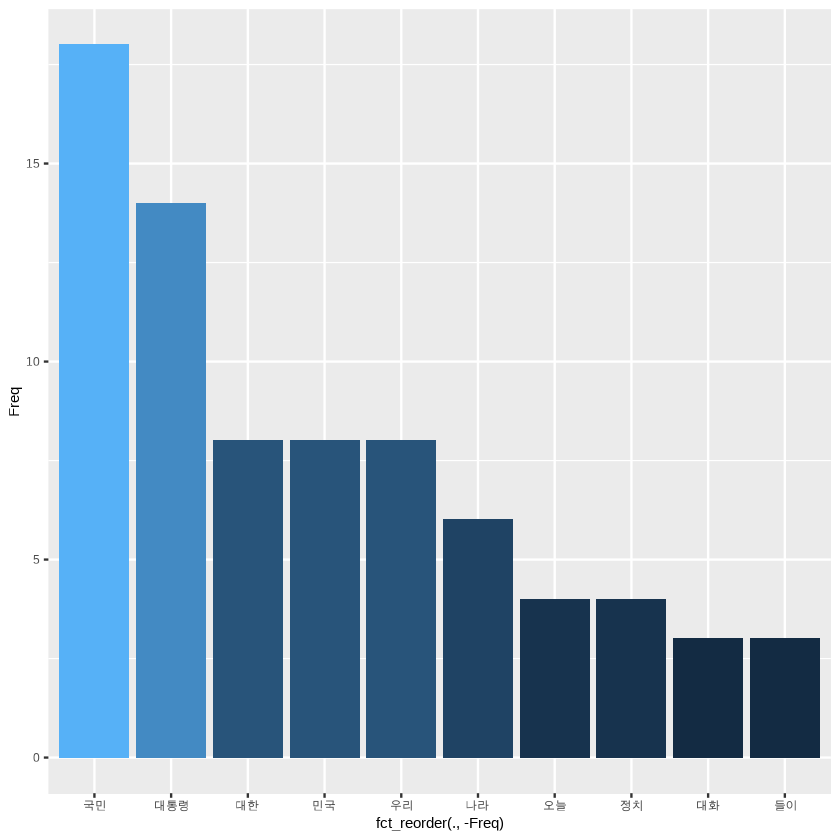

In [384]:
wordcount %>% arrange(-Freq) %>% head(10) %>% 
    ggplot(aes(fct_reorder(., -Freq), Freq)) + 
    geom_col(aes(fill = Freq)) + 
    theme(legend.position = "none")

- 가장 많이 나타난 단어는 '국민'이며, '대통령', '대한', '민국' 순으로 단어가 나타났다

### 3)
- 전처리된 데이터를 이용해 워드클라우드를 작성하고 인사이트를 추출하시오.

In [392]:
a <- wordcount %>% arrange(-Freq)

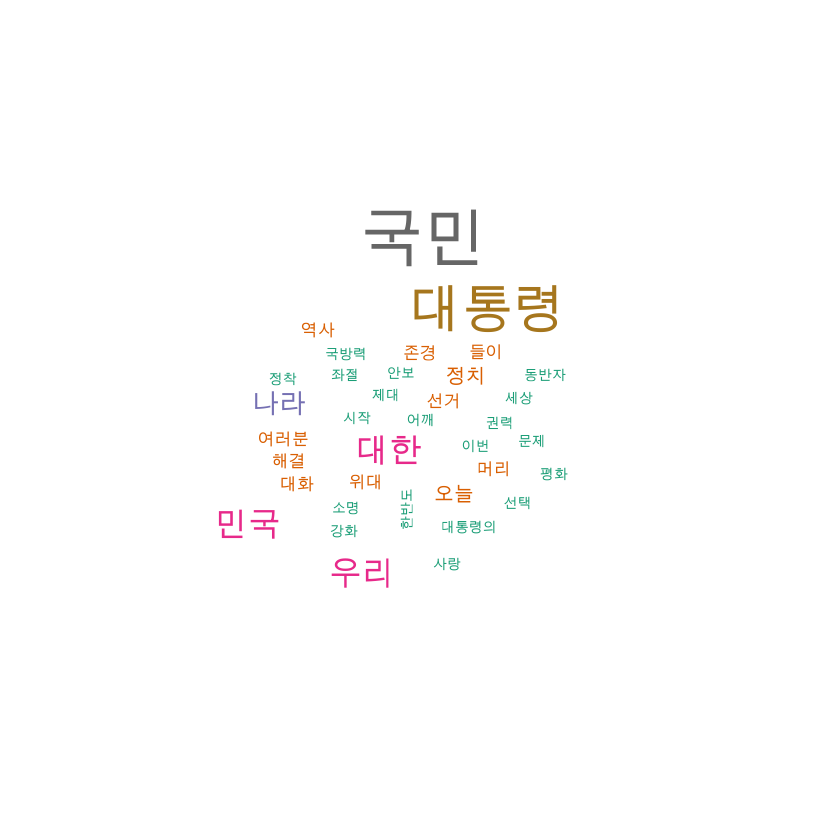

In [394]:
wordcloud(a[, 1], a[, 2], 
          color = brewer.pal(8, "Dark2"), min.freq = 2)

- 텍스트마이닝을 통해 추출된 단어들을 워드클라우드로 제작한 결과, 위와 같은 결과를 찾을 수 있었으며, 워드클라우드를 통해서 민심에 대해 많은 언급을 했고(국민, 우리, 여러분 등), 통일에 관한 문제 (안보, 평화, 대화, 강화, 한반도, 국방력, 동반자 등)에 대해서 많은 생각을 가지고 연설을 했다고 판단할 수 있다.